# Project: Investigation TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> We will be investigating data collected from The Movie Database. The dataset for the movie Db can be found through Kaggle [here](https://www.google.com/url?q=https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv&sa=D&ust=1516326655627000&usg=AFQjCNHZaKHJgY2GWGsbxGH4hWo2T2nAyA)

>As the  movie industry is run like a business, we will use profits to determine the success of a movie. We will ask questions like:
* Identify if the metrics used to identify the subjective appreciation of a movie like Voter rating and Popularity correspond to the success of a movie
* Identify if the decisions on the business end like 'month of release' and 'run time' correspond to a movies success in the box office and its popularity
* BONUS: Identify if there are key cast members that correspond to the success of a movie and/or its popularity
    * Note that the bonus portion is an oppurtinity to utlize and practice data slicing techniques while the results are not necessarily definitive answers on correlation as a single measure of movies success/popularity will be weighed against a single cast member

In [1]:
# Import packages 
import pandas as pd
%matplotlib inline
import numpy as np

#Create dataframe of imported csv file 
df_movies = pd.read_csv('./000 data/201tmdb-movies.csv')


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
#1 Use .head to observe the general content of the movie db table 
df_movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#1 Identify general properties like 'null values', datatypes using .info
df_movies.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
#3 Identify any duplicated rows, which is usually a sign of error in entry
sum(df_movies.duplicated())

1


### Data Cleaning

 - Remove Columns: _homepage_, _tagline_, _overview_, _keywords_
     - Contents of these columns are not relevant for our Analysis or any kind of numerical analysis
 - Remove ID columns to better streamline relevant information: _id_, *imdb_id*
     - Since IDs are just unique identifiers, they dont any benefit for numerical analysis
 - Remove Columns as better info exists in other columns: _budget_, _revenue_, *release_year*, *vote_count*
     - The 'Adjusted' budget and revenue values (*budget_adj*/*revenue_adj* are more significant as the comparison applies across all the years of movie releases
     - *release_year* can be determined for *release_date* if required. Additionally the main questions we are asking are trying to determine correlation of month of release and not the year
     - *vote_count* is not removed to access the significance of *vote_average*
 - Remove columns as specifically note relevant to our analysis: *production_companies*, *genres*, *director*
     - might be relevant for other analysis, but at least not for the questions we are asking
 - Add a column called *profit_adj* and remove *revenue_adj* and *budget_adj*
     - *revenue* and *budget* dont need to indidually analyzed. We only need the profit
 - change date datatype from Object/String: *release_date*

In [5]:
#There's only one duplicated row. So that needs to be removed
df_movies.drop_duplicates(inplace=True)


In [6]:
#Index of columns BEFORE removal
df_movies.columns 

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [7]:
# Add the *profit_adj* column and convert to 'int' for easy viewing
df_movies['profit_adj'] = df_movies['revenue_adj'] - df_movies['budget_adj']
df_movies['profit_adj'] = df_movies['profit_adj'].astype(int)


In [8]:
#Removing columns as highlighted and justified in the beginning of this section
# Also remove revenue_adj and budget_adj columns as profit_adj column has been added
df_movies.drop(['homepage', 'tagline', 'overview', 'keywords', 'imdb_id', 'id', 
                'revenue', 'budget', 'release_year', 
                'production_companies', 'genres', 'director',
               'revenue_adj', 'budget_adj'], axis=1, inplace=True)


In [9]:
#Index of columns AFTER removal
df_movies.columns


Index(['popularity', 'original_title', 'cast', 'runtime', 'release_date',
       'vote_count', 'vote_average', 'profit_adj'],
      dtype='object')

In [10]:
#release date type needs to be changed to type date
df_movies['release_date'] = pd.to_datetime(df_movies['release_date'])

In [11]:
# Verify datatypes and occureance of any null values
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 8 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
cast              10789 non-null object
runtime           10865 non-null int64
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
profit_adj        10865 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(2)
memory usage: 721.5+ KB


In [12]:
# Extra step for purposes of 'Bonus' data analysis later
# Export a csv of cleanup data -  1. Continue and delete 'cast' for master analysis 
                                # 2. Import and Continue with splitting 'cast' column for bonus analsys
df_movies.to_csv('./000 data/201OUTPUT-clean_moviedb.csv', index=False)

In [34]:
#remove the *cast* column entirely from master dataframe
# Once *cast* column is removed, there will be no more null values and will be ready for further analysis
df_movies.drop('cast', axis=1, inplace=True)

KeyError: "['cast'] not found in axis"

In [35]:
# Evident from info that df_movies is ready for exploration to answer questiosn 1 and 2
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
release_date      10865 non-null datetime64[ns]
vote_count        10865 non-null int64
vote_average      10865 non-null float64
profit_adj        10865 non-null int32
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(1)
memory usage: 636.6+ KB


In [36]:
# Continue to cleanup bonus data frame
# Start with .info
df_bonus = pd.read_csv('./000 data/OUTPUT-clean_moviedb.csv')
df_bonus.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10865 entries, 0 to 10864
Data columns (total 7 columns):
popularity        10865 non-null float64
original_title    10865 non-null object
runtime           10865 non-null int64
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
profit_adj        10865 non-null int64
dtypes: float64(2), int64(3), object(2)
memory usage: 594.3+ KB


In [37]:
# Remove rows with 'cast' null values
df_bonus.dropna(inplace=True)

In [38]:
# Only need to access effect of cast members on vote_average, popularity and profits - Remove all other columns
df_bonus.drop(['original_title', 'runtime', 'release_date'], axis=1, inplace=True)

In [39]:
# Shows cast column where cast is split up using vertical bars
df_bonus['cast'][df_bonus['cast'].str.contains('\|')]
                           

KeyError: 'cast'

In [40]:
# adding a ~ shows 144 entries in cast that do not contain the vertical bar
df_bonus['cast'][~df_bonus['cast'].str.contains('\|')]


KeyError: 'cast'

In [41]:
#step 1 - collect all actors in a temp data frame that have the vertical bar
temp_df = df_bonus[df_bonus['cast'].str.contains('\|')]

KeyError: 'cast'

In [42]:
# Create split using the first 2 cast members 
df1 = temp_df.copy()
df2 = temp_df.copy()


In [43]:
# Then grab individual cast based on index and put into the dataframe created above
df1['cast'] = df1['cast'].apply(lambda x: x.split("|")[0])


In [44]:
df2['cast'] = df2['cast'].apply(lambda x: x.split("|")[1])

In [45]:
new_rows = df1.append(df2)

In [46]:
#Remove the original rows where actors are split by vertical bars
df_bonus.drop(temp_df.index, inplace=True)

In [47]:
#Now add the new rows where cast[1] and cast[2] have been extracted
df_bonus = df_bonus.append(new_rows, ignore_index=True)

C:\Users\Raja\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


<a id='eda'></a>
## Exploratory Data Analysis


### Question 1: Does Subjective Metrics like *Voter Rating* and *Popularity* correspond to the success of a movie

Text(0.5, 1.0, 'Movies grouped by Adjusted Profits')

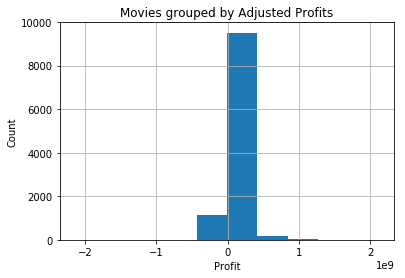

In [48]:
## import matplot lib to use plot funcdtin
import matplotlib.pyplot as plt

# First observe the range and outliers for just Profit before we use it as an indicator for success
df_movies['profit_adj'].hist();
plt.ylabel('Count')
plt.xlabel('Profit')
plt.title('Movies grouped by Adjusted Profits')

In [49]:
df_movies['profit_adj'].min(), df_movies['profit_adj'].max()

(-2147483648, 2128035624)

Based on the findings, we can conclude that using `Profit_adj` as an indicator of success when evaluating other variables is valid. 

There are also some clear outliers on both ends, with losses as significant as the profit in terms of the min and the max. However it can be seen that most movies make profits, so it is fair to evaluate relative success based on other factors. 

Text(0.5, 1.0, 'Correlation between Voting Average and Profit')

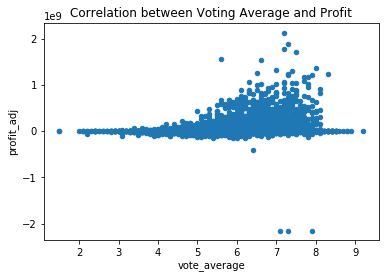

In [50]:


#Scatter plot to observerve correlation between 'Vote Average' and 'Profit'
df_movies.plot.scatter(x='vote_average', y='profit_adj');
plt.title('Correlation between Voting Average and Profit')

Text(0.5, 1.0, 'correlation between Popularity and Profit')

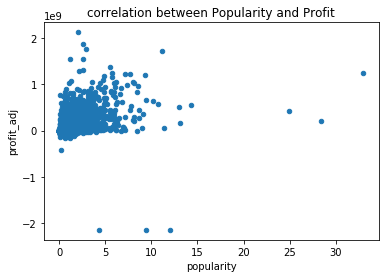

In [51]:
#Scatter plot to observerve correlation between 'Popularity' and 'Profit'
df_movies.plot.scatter(x='popularity', y='profit_adj');
plt.title('correlation between Popularity and Profit')

#### Scatter Plot Conclusions
There seems to be correlation. Next approach will be to look at group by of vote numbers

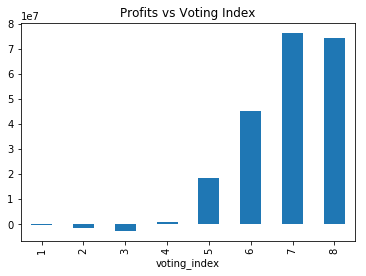

In [52]:
# Start by creating the bin edges, to create a new column called 'voting index'
    #NOTE: Removed edges (0 to 1 and 9 - 10) as numbers were negligible
bin_edges = [1, 2, 3, 4, 5, 6, 7, 8, 9]
bin_names = [1, 2, 3, 4, 5, 6, 7, 8]
df_movies['voting_index'] = pd.cut(df_movies['vote_average'], bin_edges, labels=bin_names)

#correlation to Profits
df_movies.groupby('voting_index').mean()['profit_adj'].plot(kind='bar', title = "Profits vs Voting Index");

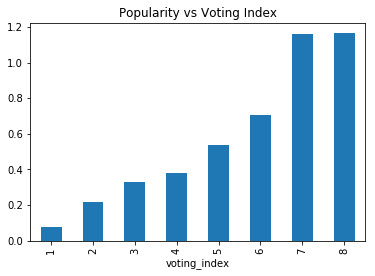

In [53]:
# Also observe correlation to 'Popularity'
df_movies.groupby('voting_index').mean()['popularity'].plot(kind='bar', title = "Popularity vs Voting Index");

#### Group By Conclusions (on vote_numbers)
 - There is a clear correlation between *Voting Index* and *Popularity*. This indicates that there is correlation between *Voting Average* and *Popularity*. The higher the voting average, the higher the popularity of the movie
 - There is also a clear correlation between *Voting Index* and *Profit*
 - In both cases there is pretty significant jump and level off in the 7 and 8 voting index category

### Question 2: Does Quantifiable Metrics like *Run time* and *Month of release* correspond to sucess or popularity of movie

#### Effects of Runtime

Text(0.5, 1.0, 'Movies grouped by Run time')

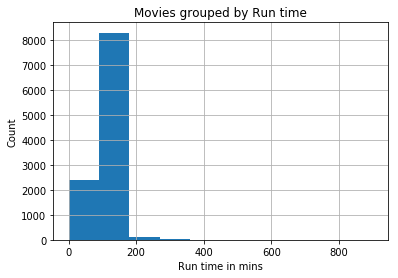

In [54]:
# Evaluate runtime individually
df_movies['runtime'].hist()
plt.ylabel('Count')
plt.xlabel('Run time in mins')
plt.title('Movies grouped by Run time')

In [55]:
df_movies['runtime'].max(), df_movies['runtime'].min()

(900, 0)

From the results above, the outliers are extreme. It will be beneficial to see the effect of runtime on other factors, instead of viewing the effect of the extreme outliers. Most of the movies are grouped into the 'under 200' category and will provided sufficient evidence for correlation

Text(0.5, 1.0, 'correlation between runtime and adjusted profits')

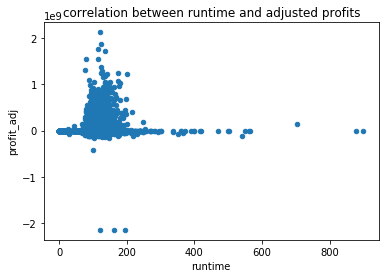

In [56]:
# Run time as a factor
# One of the measurable factors that is usually disagreed upon between the artists (Directors, Editors, etc) 
    #and the producers is run time. Does a high run time have a siginficant impact on profits or popularity

#Scatter plot on runtime against profits
df_movies.plot.scatter(x='runtime', y='profit_adj');
plt.title('correlation between runtime and adjusted profits')

Text(0.5, 1.0, 'correlation between runtime and popularity')

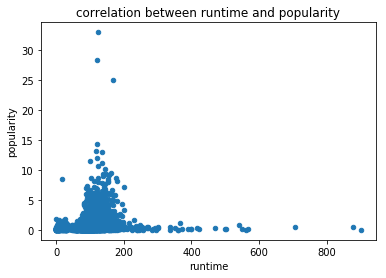

In [57]:
# Continuing with runtime scatterplot against popularity
df_movies.plot.scatter(x='runtime', y='popularity');
plt.title('correlation between runtime and popularity')

#### Conclusions from runtime scatterplots:
It is difficult to spot a correlation even though it is evident that there is cut off area when runtime over a certain amount leads to drop in popularity and profits. As clear as the cutoff is, a more detailed approach using group by (and maybe ignoring some outliers) will be required to observer a clearer correlation

In [58]:
#Attempt to start create bin_edges
df_movies['runtime'].describe()

count    10865.000000
mean       102.071790
std         31.382701
min          0.000000
25%         90.000000
50%         99.000000
75%        111.000000
max        900.000000
Name: runtime, dtype: float64

In [59]:
# Evident from the describe() above that there is huge gap between the 75% and max.
# We will start with the basic bin_edges following standard procedure and make adjustments to the max edges based on count
bin_edges = [0, 90, 99, 111, 900]
bin_names = ['low', 'moderate', 'normal', 'high']
df_movies['runtime_category'] = pd.cut(df_movies['runtime'], bin_edges, labels = bin_names)
df_movies.groupby('runtime_category').count()

,popularity,original_title,runtime,release_date,vote_count,vote_average,profit_adj,voting_index
runtime_category,,,,,,,,
low,2931,2931,2931,2931,2931,2931,2931,2931
moderate,2651,2651,2651,2651,2651,2651,2651,2651
normal,2542,2542,2542,2542,2542,2542,2542,2542
high,2710,2710,2710,2710,2710,2710,2710,2709


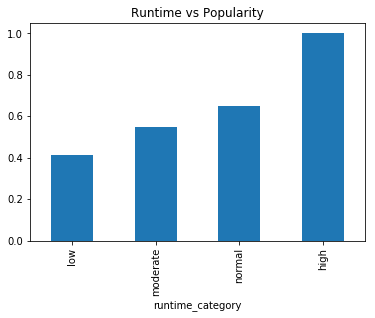

In [60]:
# So the counts seem consistent regardless of the outliers evident on the scatterplot. We can plot as is

# Plot for runtime_category vs popularity
df_movies.groupby('runtime_category').mean()['popularity'].plot(kind = 'bar', title = 'Runtime vs Popularity');


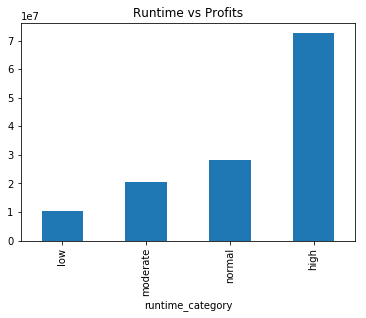

In [61]:
# Plot for runtime_category vs profits
df_movies.groupby('runtime_category').mean()['profit_adj'].plot(kind = 'bar', title = 'Runtime vs Profits')

#### Conclusions for Runtime bar plots
It is clear that increasing the runtime definitely improves profitibility as well as popularity. The scatterplots clearly indiciate threshold areas above which profitibility and profits will drop



#### Effects of Month of release


In [62]:
# Have to use strftime to extract the month portion of date

#Use it to see effect on Popularity
df_movies.groupby(df_movies['release_date'].dt.strftime('%B')).mean()['popularity'].sort_values()

release_date
January      0.460574
April        0.562475
September    0.564820
August       0.584363
February     0.589931
October      0.613168
March        0.642808
July         0.747678
May          0.749997
December     0.750784
November     0.755466
June         0.800755
Name: popularity, dtype: float64

In [63]:
#Use it to see effect on Profits
df_movies.groupby(df_movies['release_date'].dt.strftime('%B')).mean()['profit_adj'].sort_values()

release_date
January      1.114817e+07
September    1.224897e+07
February     1.836432e+07
October      1.965330e+07
August       2.113720e+07
April        2.428453e+07
March        2.671072e+07
November     4.377095e+07
July         5.036820e+07
May          5.318907e+07
December     5.456884e+07
June         7.033081e+07
Name: profit_adj, dtype: float64

#### Conclusions from Dates GroupBy
 - Most popular and profitable month is **June**
 - Other Profitable and popular months are: December, May, July, November

**IMPORTANT OBSERVATION**: Even though *November* is the second most popular month, it is not the second highest profitable month, even though 'Dec', May', July' maintain their order in Profitiability and Popularity

<a id='conclusions'></a>
## Conclusions

> **Conclusion 1**: Profitibility as well as Popularity is directly correlated with Voting Averages. The higher the audience determines the quality of a film based on voting average, the better the success of the movie is in terms of Profits as well as in terms of Popularity

> **Conclusion 2**: Business decisions should cater to Increasing the runtime as it has a direct correlation with Profits as well as Popularity. However it is evident from the scatter plots that increasing the runtime over a certain amount will definitely result in drops in both. Also the most profitable time to release a movie are (from highest) June, December, May, July, November. You should note that even though November results in high popularity, the profitability numbers are not at the same level 

> **Limitations**
 - Dataset has missing values that were removed as part of creating cleaner and consistent data. Even though a small percentage of data was removed, the final conclusions can be accurate but the level of differences will be an estimation
 - A two dimensional correlation doesn't take into account the effect of other variables. Further statistical analysis is required to access the relevance of the correlation compared to other variables 